In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/Assignment1_StreamFlow_Subscription_Data.csv')

In [3]:
# Evaluating dataset on a large scale

df.head()

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn
0,1,56,Other,Central,2020-06-07 01:53:37.656934,Premium,19.99,Credit Card,31.513153,Action,PC,1.195762,1023,5,0,NaN,NaN
1,2,69,Other,West,2024-02-21 01:53:37.656980,Standard,14.99,Credit Card,4.982277,Drama,PC,0.809002,1076,1,0,NaN,NaN
2,3,46,Female,North,2022-10-06 01:53:37.656995,Standard,14.99,PayPal,4.114953,Sci-Fi,Tablet,1.153570,1095,2,0,NaN,NaN
3,4,32,Female,East,2022-01-04 01:53:37.657006,Standard,14.99,Credit Card,60.244820,Action,TV,0.609503,1003,1,0,NaN,NaN
4,5,60,Female,North,2020-03-13 01:53:37.657017,Standard,14.99,Credit Card,4.711855,Sci-Fi,Mobile,0.359971,1012,4,0,NaN,NaN


In [4]:
# Gaining information on dataset as a whole
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   User_ID                  1000 non-null   int64  
 1   Age                      1000 non-null   int64  
 2   Gender                   1000 non-null   object 
 3   Location                 1000 non-null   object 
 4   Subscription_Start_Date  1000 non-null   object 
 5   Subscription_Type        1000 non-null   object 
 6   Monthly_Payment          1000 non-null   float64
 7   Payment_Method           1000 non-null   object 
 8   Monthly_Hours_Watched    1000 non-null   float64
 9   Favorite_Genre           1000 non-null   object 
 10  Devices_Used             1000 non-null   object 
 11  Average_Session_Length   1000 non-null   float64
 12  Content_ID               1000 non-null   int64  
 13  Rating_Given             1000 non-null   int64  
 14  Churned                  

In [5]:
# Univariate analysis
df.describe()

,User_ID,Age,Monthly_Payment,Monthly_Hours_Watched,Average_Session_Length,Content_ID,Rating_Given,Churned
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,44.385000,14.580000,19.071653,1.893771,1049.201000,3.030000,0.246000
std,288.819436,15.321669,3.404922,19.279140,1.868852,29.268058,1.422365,0.430894
min,1.000000,18.000000,9.990000,0.041574,0.000486,1000.000000,1.000000,0.000000
25%,250.750000,31.750000,9.990000,5.490739,0.548918,1023.000000,2.000000,0.000000
50%,500.500000,45.000000,14.990000,13.361219,1.271808,1048.000000,3.000000,0.000000
75%,750.250000,57.000000,14.990000,26.471636,2.623575,1075.000000,4.000000,0.000000
max,1000.000000,70.000000,19.990000,139.170408,11.417557,1099.000000,5.000000,1.000000


In [6]:
# Analyzing the churned variable
df[df['Churned'] == 1].describe()

,User_ID,Age,Monthly_Payment,Monthly_Hours_Watched,Average_Session_Length,Content_ID,Rating_Given,Churned
count,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.0
mean,505.361789,43.174797,14.502195,17.039672,1.920114,1050.443089,2.593496,1.0
std,284.676765,15.507139,3.494289,17.236483,1.841691,30.536877,1.273513,0.0
min,13.000000,18.000000,9.990000,0.041574,0.000821,1000.000000,1.000000,1.0
25%,273.250000,30.000000,9.990000,5.105890,0.641881,1022.250000,2.000000,1.0
50%,501.500000,41.000000,14.990000,11.948593,1.277379,1050.000000,2.000000,1.0
75%,752.250000,56.000000,14.990000,23.618435,2.704228,1077.750000,3.000000,1.0
max,999.000000,70.000000,19.990000,108.122364,11.417557,1099.000000,5.000000,1.0


In [7]:
# Conversely, analyzing those that have not churned
df[df['Churned'] == 0].describe()

,User_ID,Age,Monthly_Payment,Monthly_Hours_Watched,Average_Session_Length,Content_ID,Rating_Given,Churned
count,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,754.0
mean,498.913793,44.779841,14.605385,19.734607,1.885177,1048.795756,3.172414,0.0
std,290.327761,15.250257,3.377227,19.866013,1.878760,28.851328,1.440076,0.0
min,1.000000,18.000000,9.990000,0.076891,0.000486,1000.000000,1.000000,0.0
25%,245.250000,32.000000,9.990000,5.657050,0.516868,1023.000000,2.000000,0.0
50%,500.000000,45.500000,14.990000,13.791423,1.271808,1047.500000,3.000000,0.0
75%,748.500000,57.000000,14.990000,27.368681,2.612418,1074.000000,4.000000,0.0
max,1000.000000,70.000000,19.990000,139.170408,11.049324,1099.000000,5.000000,0.0


<Axes: xlabel='Age', ylabel='Count'>

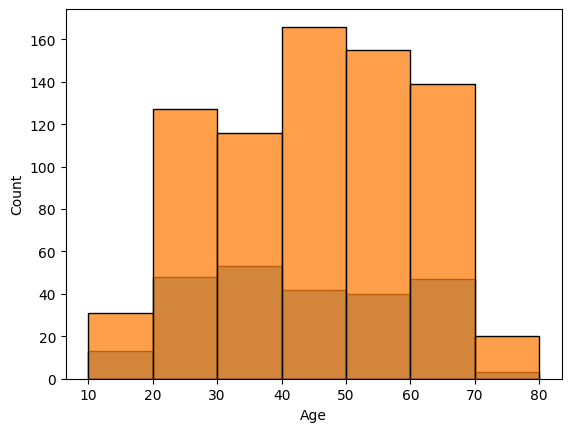

In [8]:
# Comparing the frequency of churns by age group
churned_df = df[df['Churned'] == 1]
non_churned_df = df[df['Churned'] == 0]

sns.histplot(churned_df['Age'], bins=range(10, 81, 10))
sns.histplot(non_churned_df['Age'], bins=range(10, 81, 10))

In [9]:
# Determining the rate of churn for age ranges
age_bins = pd.cut(df['Age'], bins=range(10, 81, 10))

churn_rate_age = df.groupby(age_bins)['Churned'].mean()

print(churn_rate_age)

Age
(10, 20]    0.265625
(20, 30]    0.274854
(30, 40]    0.298851
(40, 50]    0.200935
(50, 60]    0.207865
(60, 70]    0.251256
(70, 80]         NaN
Name: Churned, dtype: float64


/var/folders/x3/4t6wq2jj56z96y6l3_b9mm0r0000gn/T/ipykernel_28728/3448742614.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate_age = df.groupby(age_bins)['Churned'].mean()


In [10]:
# Evaluating whether there is a correlation based on the ages
correlation = df['Churned'].corr(df['Age'])
print(f"Correlation Coefficient: {correlation}")

Correlation Coefficient: -0.04513894326780746


<Axes: xlabel='Subscription_Type', ylabel='Count'>

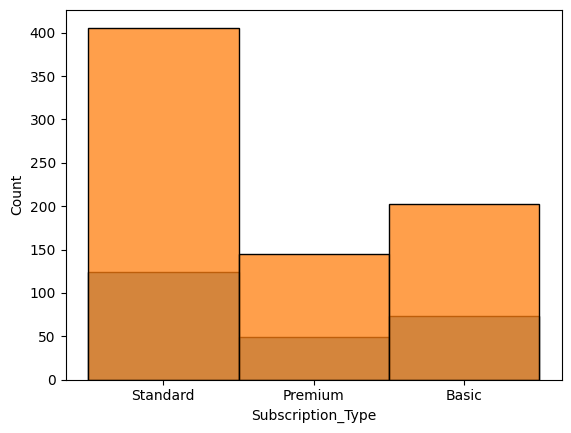

In [11]:
# Evaluating the churned amount for each subscription type
sns.histplot(df[df['Churned'] == 1]['Subscription_Type'])
sns.histplot(df[df['Churned'] == 0]['Subscription_Type'])

In [12]:
# Determining the churn rate based on the subscription types

churn_rate_subscription = df.groupby('Subscription_Type')['Churned'].mean()
print(churn_rate_subscription)

Subscription_Type
Basic       0.264493
Premium     0.252577
Standard    0.233962
Name: Churned, dtype: float64


<Axes: xlabel='Gender', ylabel='Count'>

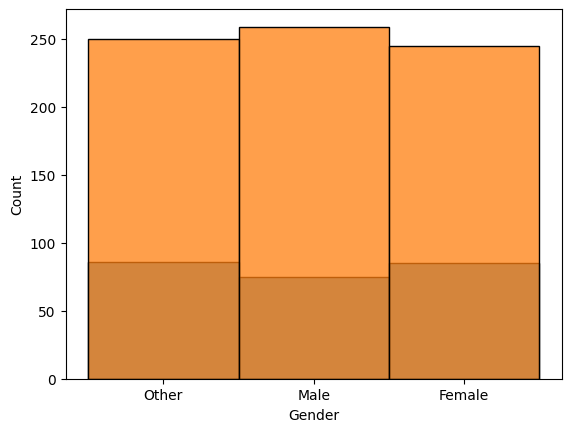

In [13]:
# Comparing the amount of churned accounts to gender
sns.histplot(df[df['Churned'] == 1]['Gender'])
sns.histplot(df[df['Churned'] == 0]['Gender'])

In [14]:
# Determining the churn rate based on the gender

churn_rate_gender = df.groupby('Gender')['Churned'].mean()
print(churn_rate_gender)

Gender
Female    0.257576
Male      0.224551
Other     0.255952
Name: Churned, dtype: float64


<Axes: xlabel='Location', ylabel='Count'>

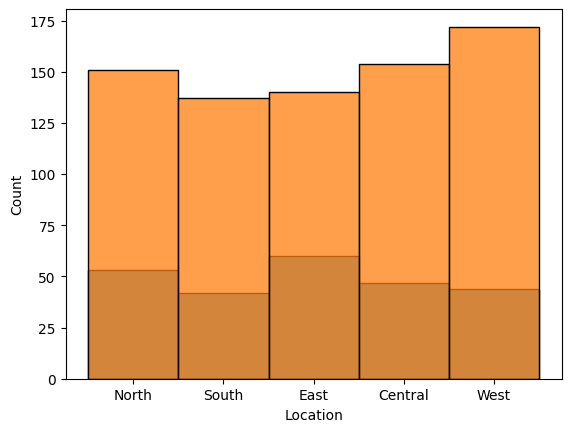

In [15]:
# Comparing churn rate to location
sns.histplot(df[df['Churned'] == 1]['Location'])
sns.histplot(df[df['Churned'] == 0]['Location'])

In [16]:
# Determining churn rate based on living location

churn_rate_location = df.groupby('Location')['Churned'].mean()
print(churn_rate_location)

Location
Central    0.233831
East       0.300000
North      0.259804
South      0.234637
West       0.203704
Name: Churned, dtype: float64


<Axes: xlabel='Subscription_Year', ylabel='Count'>

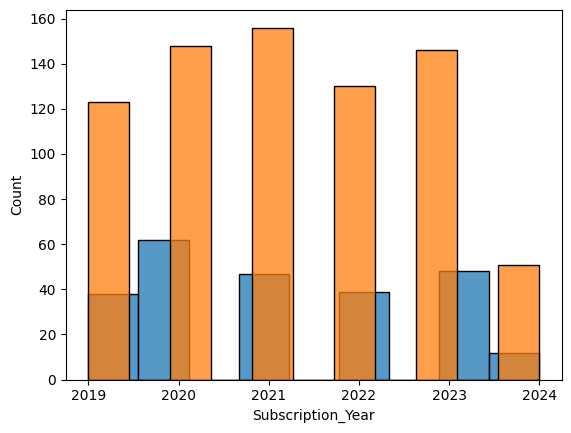

In [17]:
# Evaluating the years subscriptions were bought
df['Subscription_Year'] = pd.to_datetime(df['Subscription_Start_Date']).dt.year

sns.histplot(df[df['Churned'] == 1]['Subscription_Year'])
sns.histplot(df[df['Churned'] == 0]['Subscription_Year'])

In [18]:
# Determining the rate of churning each year

churn_rate_year = df.groupby('Subscription_Year')['Churned'].mean()
print(churn_rate_year)

Subscription_Year
2019    0.236025
2020    0.295238
2021    0.231527
2022    0.230769
2023    0.247423
2024    0.190476
Name: Churned, dtype: float64


<Axes: xlabel='Subscription_Type', ylabel='Count'>

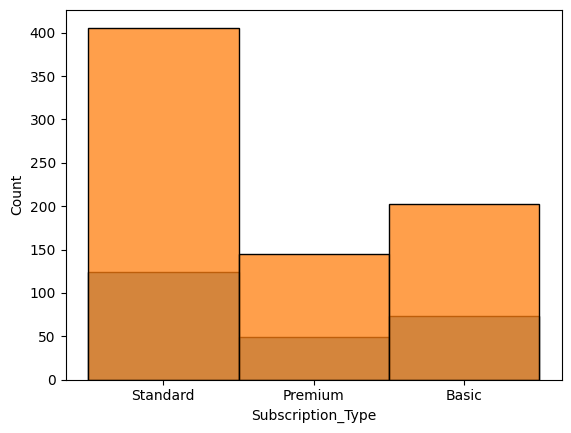

In [19]:
# Subscription types and whether one has more frequency of churns
sns.histplot(df[df['Churned'] == 1]['Subscription_Type'])
sns.histplot(df[df['Churned'] == 0]['Subscription_Type'])

In [20]:
# Determining the rate each subscription type churns
churn_rate_subtype = df.groupby('Subscription_Type')['Churned'].mean()
print(churn_rate_subtype)

Subscription_Type
Basic       0.264493
Premium     0.252577
Standard    0.233962
Name: Churned, dtype: float64


<Axes: xlabel='Payment_Method', ylabel='Count'>

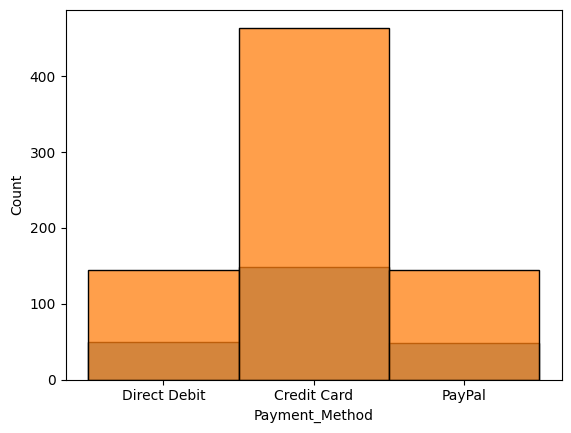

In [21]:
# Evaluating payment methods
sns.histplot(df[df['Churned'] == 1]['Payment_Method'])
sns.histplot(df[df['Churned'] == 0]['Payment_Method'])

In [22]:
# Evaluating how often each payment method churns
churn_rate_paymethod = df.groupby('Payment_Method')['Churned'].mean()
print(churn_rate_paymethod)

Payment_Method
Credit Card     0.243067
Direct Debit    0.252577
PayPal          0.248705
Name: Churned, dtype: float64


<Axes: xlabel='Monthly_Hours_Watched', ylabel='Count'>

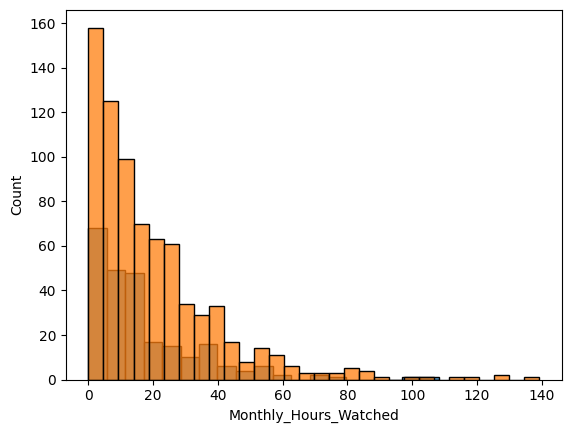

In [23]:
# Evaluating monthly hours watched
sns.histplot(df[df['Churned'] == 1]['Monthly_Hours_Watched'])
sns.histplot(df[df['Churned'] == 0]['Monthly_Hours_Watched'])

In [24]:
# Determining the churn rate by hours watched
hours_watched_bins = pd.cut(df['Monthly_Hours_Watched'], bins=range(0, 140, 5))

churn_rate_hrs = df.groupby(hours_watched_bins)['Churned'].mean()

print(churn_rate_hrs)

Monthly_Hours_Watched
(0, 5]        0.265217
(5, 10]       0.267442
(10, 15]      0.264516
(15, 20]      0.298969
(20, 25]      0.169014
(25, 30]      0.142857
(30, 35]      0.283019
(35, 40]      0.227273
(40, 45]      0.185185
(45, 50]      0.250000
(50, 55]      0.294118
(55, 60]      0.200000
(60, 65]      0.111111
(65, 70]      0.166667
(70, 75]      0.333333
(75, 80]      0.250000
(80, 85]      0.000000
(85, 90]      0.000000
(90, 95]           NaN
(95, 100]     0.000000
(100, 105]    1.000000
(105, 110]    0.500000
(110, 115]    0.000000
(115, 120]    0.000000
(120, 125]         NaN
(125, 130]    0.000000
(130, 135]         NaN
Name: Churned, dtype: float64


/var/folders/x3/4t6wq2jj56z96y6l3_b9mm0r0000gn/T/ipykernel_28728/3521962453.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate_hrs = df.groupby(hours_watched_bins)['Churned'].mean()


In [25]:
# Comparing monthly hours watched by doing univariate analysis on both churned and unchurned groups
df[(df['Churned'] == 1)]['Monthly_Hours_Watched'].describe()

count    246.000000
mean      17.039672
std       17.236483
min        0.041574
25%        5.105890
50%       11.948593
75%       23.618435
max      108.122364
Name: Monthly_Hours_Watched, dtype: float64

In [26]:
df[(df['Churned'] == 0)]['Monthly_Hours_Watched'].describe()

count    754.000000
mean      19.734607
std       19.866013
min        0.076891
25%        5.657050
50%       13.791423
75%       27.368681
max      139.170408
Name: Monthly_Hours_Watched, dtype: float64

In [27]:
# Finding correlation coefficient for monthly hours watched
correlation = df['Monthly_Hours_Watched'].corr(df['Churned'])
print(f"Correlation Coefficient: {correlation}")

Correlation Coefficient: -0.060232537705849375


<Axes: xlabel='Favorite_Genre', ylabel='Count'>

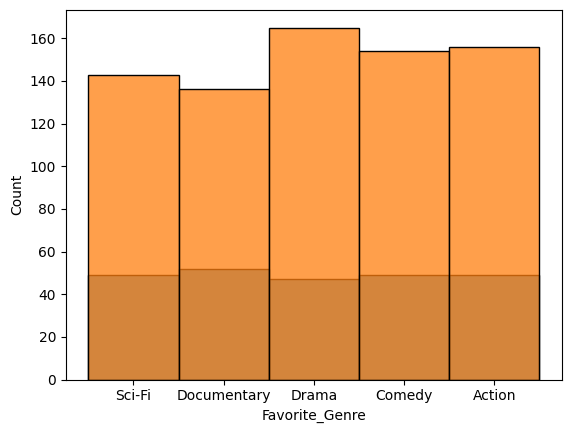

In [28]:
# Looking at favourite genre for churned and unchurned accounts
sns.histplot(df[df['Churned'] == 1]['Favorite_Genre'])
sns.histplot(df[df['Churned'] == 0]['Favorite_Genre'])

In [29]:
churn_rate_genre = df.groupby('Favorite_Genre')['Churned'].mean()
print(churn_rate_genre)

Favorite_Genre
Action         0.239024
Comedy         0.241379
Documentary    0.276596
Drama          0.221698
Sci-Fi         0.255208
Name: Churned, dtype: float64


<Axes: xlabel='Devices_Used', ylabel='Count'>

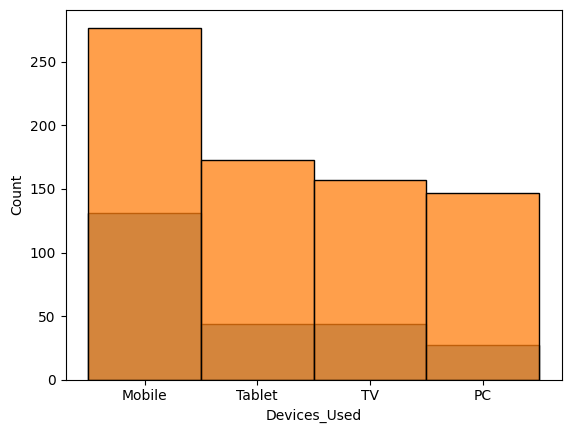

In [30]:
# Evaluating which devices were used 
sns.histplot(df[df['Churned'] == 1]['Devices_Used'])
sns.histplot(df[df['Churned'] == 0]['Devices_Used'])

In [31]:
# Measuring the churn rate for the device used
churn_rate_device = df.groupby('Devices_Used')['Churned'].mean()
print(churn_rate_device)

Devices_Used
Mobile    0.321078
PC        0.155172
TV        0.218905
Tablet    0.202765
Name: Churned, dtype: float64


<Axes: xlabel='Average_Session_Length', ylabel='Count'>

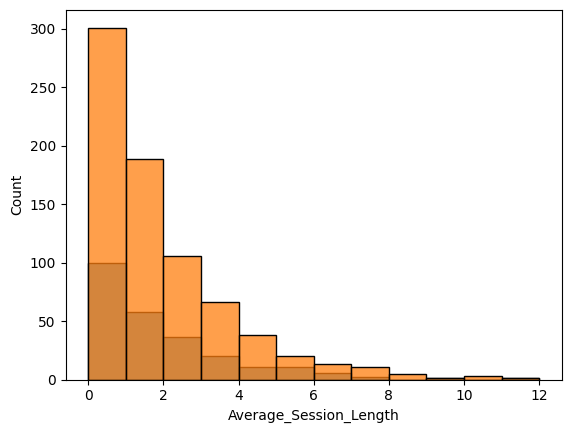

In [32]:
# Evaluating how long the usage sessions were
churned_df = df[df['Churned'] == 1]
non_churned_df = df[df['Churned'] == 0]

sns.histplot(churned_df['Average_Session_Length'], bins=range(0, 13, 1))
sns.histplot(non_churned_df['Average_Session_Length'], bins=range(0, 13, 1))

In [33]:
# Determining the churn rate by hours watched
length_bins = pd.cut(df['Average_Session_Length'], bins=range(0, 13, 1))

churn_rate_length = df.groupby(length_bins)['Churned'].mean()

print(churn_rate_length)

Average_Session_Length
(0, 1]      0.249377
(1, 2]      0.234818
(2, 3]      0.253521
(3, 4]      0.232558
(4, 5]      0.224490
(5, 6]      0.354839
(6, 7]      0.315789
(7, 8]      0.153846
(8, 9]      0.000000
(9, 10]     0.500000
(10, 11]    0.000000
(11, 12]    0.500000
Name: Churned, dtype: float64


/var/folders/x3/4t6wq2jj56z96y6l3_b9mm0r0000gn/T/ipykernel_28728/4290365620.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate_length = df.groupby(length_bins)['Churned'].mean()


<Axes: xlabel='Content_ID', ylabel='Count'>

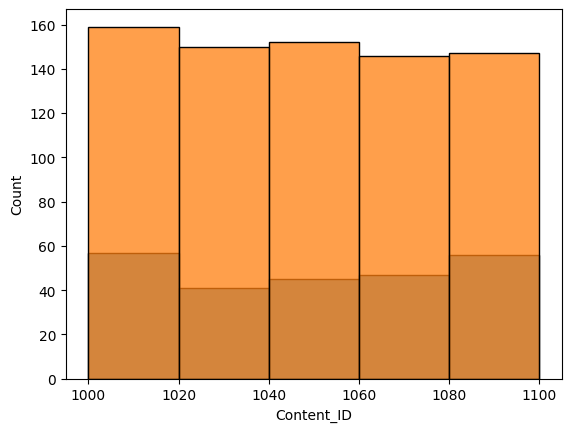

In [34]:
# Determining if Content ID is a factor in churn rate
churned_df = df[df['Churned'] == 1]
non_churned_df = df[df['Churned'] == 0]

sns.histplot(churned_df['Content_ID'], bins=range(1000, 1120, 20))
sns.histplot(non_churned_df['Content_ID'], bins=range(1000, 1120, 20))

In [35]:
# Content ID and churn rate
content_bins = pd.cut(df['Content_ID'], bins=range(1000, 1120, 20))

churn_rate_content = df.groupby(content_bins)['Churned'].mean()

print(churn_rate_content)

Content_ID
(1000, 1020]    0.255605
(1020, 1040]    0.218579
(1040, 1060]    0.227273
(1060, 1080]    0.241206
(1080, 1100]    0.282723
Name: Churned, dtype: float64


/var/folders/x3/4t6wq2jj56z96y6l3_b9mm0r0000gn/T/ipykernel_28728/2727449916.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate_content = df.groupby(content_bins)['Churned'].mean()


<Axes: xlabel='Rating_Given', ylabel='Count'>

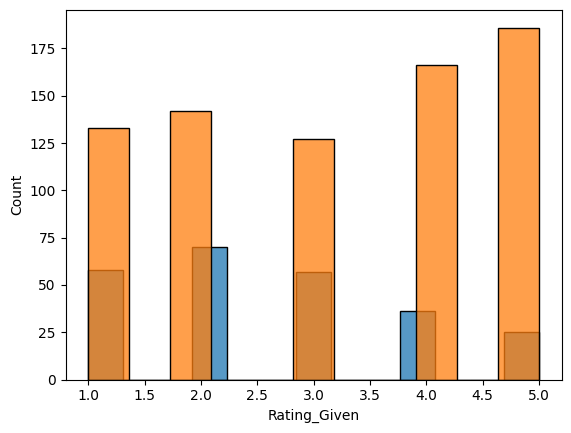

In [36]:
# Determining if the user rating had an impact on churn rate
sns.histplot(df[df['Churned'] == 1]['Rating_Given'])
sns.histplot(df[df['Churned'] == 0]['Rating_Given'])

In [37]:
# Churn rate and rating value
churn_rate_rating = df.groupby('Rating_Given')['Churned'].mean()

print(churn_rate_rating)

Rating_Given
1    0.303665
2    0.330189
3    0.309783
4    0.178218
5    0.118483
Name: Churned, dtype: float64


<Axes: xlabel='Churn_Year', ylabel='Count'>

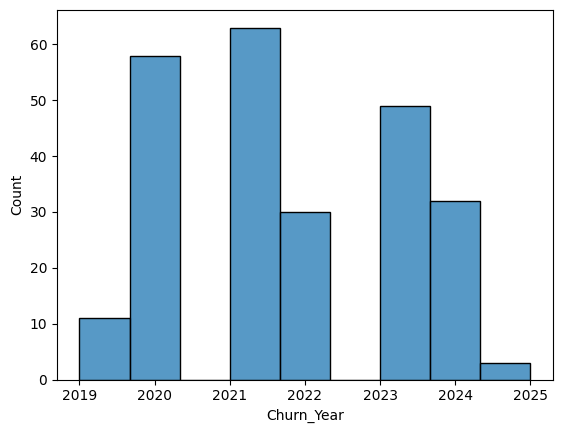

In [38]:
# Evaluating the amount of churns each year
df['Churn_Year'] = pd.to_datetime(df['Date_of_Churn']).dt.year

sns.histplot(df[df['Churned'] == 1]['Churn_Year'])

In [39]:
# Re-organizing the churn date data to be analyzed 
df['Date_of_Churn'] = pd.to_datetime(df['Date_of_Churn']).dt.normalize()
df['Subscription_Start_Date'] = pd.to_datetime(df['Subscription_Start_Date']).dt.normalize()

In [40]:
# Evaluating how long (in months) those that churn obtain their subscription before churning
df['months_difference'] = (df['Date_of_Churn'] - df['Subscription_Start_Date']) // pd.Timedelta(days=30)
df['months_difference'].describe()

count    246.000000
mean       6.044715
std        3.226490
min        1.000000
25%        3.000000
50%        6.000000
75%        9.000000
max       12.000000
Name: months_difference, dtype: float64

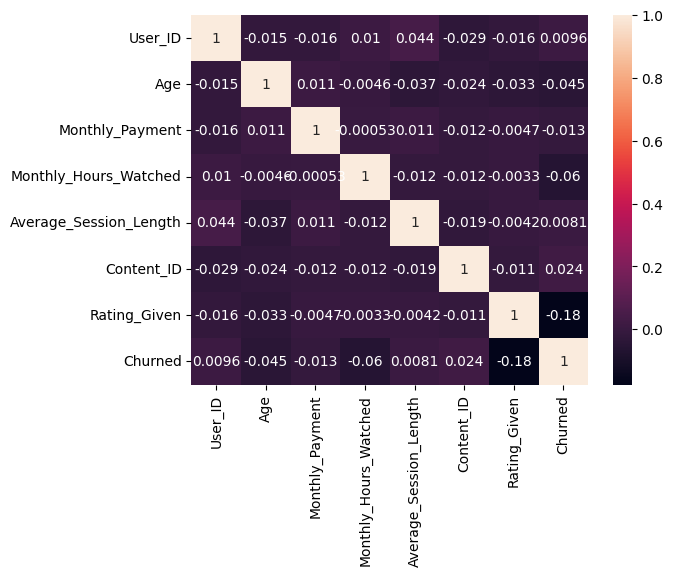

In [41]:
# Finding correlations of all numeric variables to churned
numeric_df = df.select_dtypes(include=['number'])

plt.figure()
sns.heatmap(numeric_df.iloc[:,:8].corr(), annot=True)
plt.show()

In [42]:
# Univariate analysis of key variables
df[(df['Churned'] == 1)]['Rating_Given'].describe()

count    246.000000
mean       2.593496
std        1.273513
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        5.000000
Name: Rating_Given, dtype: float64

In [43]:
df[(df['Churned'] == 0)]['Rating_Given'].describe()

count    754.000000
mean       3.172414
std        1.440076
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: Rating_Given, dtype: float64

In [44]:
df[(df['Churned'] == 1)]['Monthly_Hours_Watched'].describe()

count    246.000000
mean      17.039672
std       17.236483
min        0.041574
25%        5.105890
50%       11.948593
75%       23.618435
max      108.122364
Name: Monthly_Hours_Watched, dtype: float64

In [45]:
df[(df['Churned'] == 0)]['Monthly_Hours_Watched'].describe()

count    754.000000
mean      19.734607
std       19.866013
min        0.076891
25%        5.657050
50%       13.791423
75%       27.368681
max      139.170408
Name: Monthly_Hours_Watched, dtype: float64